In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df =pd.read_csv("/home/sreejithrnair/Downloads/Dataset/UberDataset.csv")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [15]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [17]:
df.shape

(1156, 7)

#Convert Date Columns to Datetime Format

In [47]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')


#Calculate the duration of each trip in minutes

In [57]:
df['DURATION'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60
print(df[['START_DATE', 'END_DATE', 'DURATION']].isna().sum())
df = df.dropna(subset=['DURATION'])

START_DATE    0
END_DATE      0
DURATION      0
dtype: int64


#Remove rows with missing values to clean the data

In [59]:
df.dropna(inplace=True)


#To check if there is any null value in the dataframe

In [25]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

#Bar chart showing total miles driven for each purpose

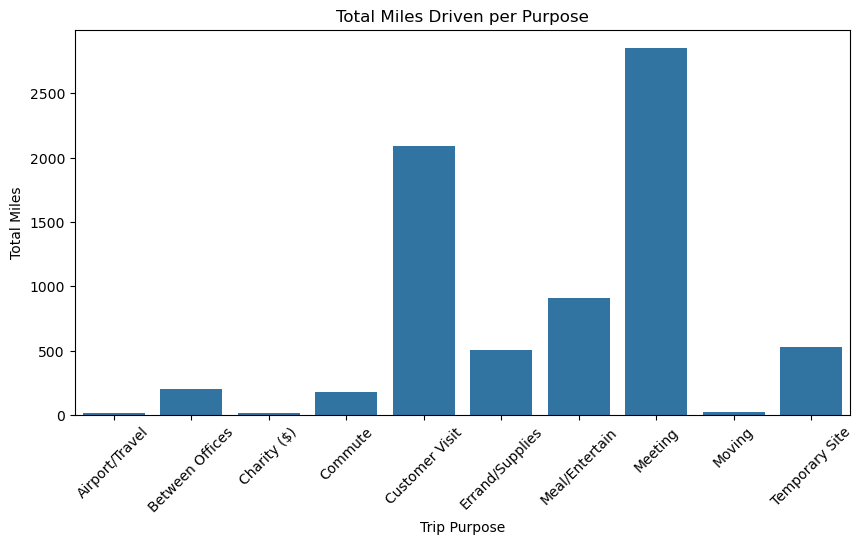

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby('PURPOSE')['MILES'].sum().index, y=df.groupby('PURPOSE')['MILES'].sum().values)
plt.xticks(rotation=45)
plt.xlabel("Trip Purpose")
plt.ylabel("Total Miles")
plt.title("Total Miles Driven per Purpose")
plt.show()

#Identify Top 10 Start locations

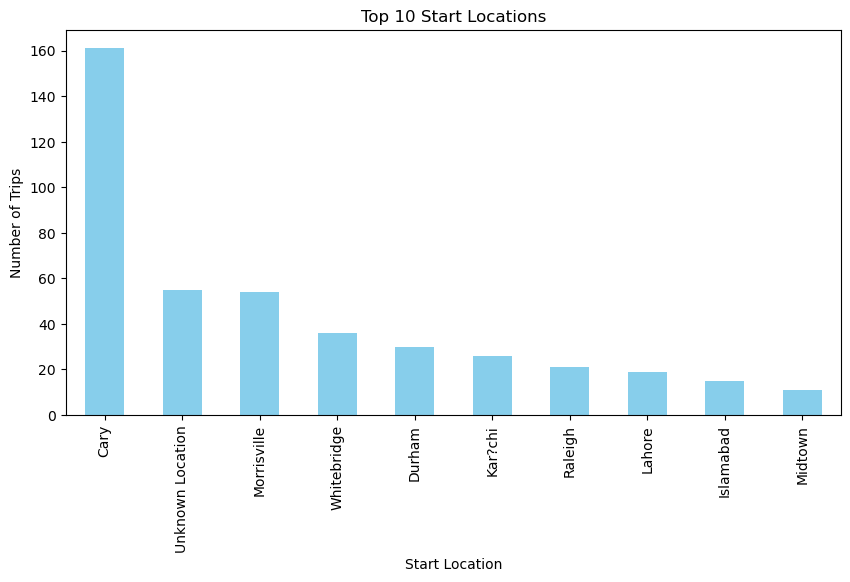

In [29]:
plt.figure(figsize=(10, 5))
df['START'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.xlabel("Start Location")
plt.ylabel("Number of Trips")
plt.title("Top 10 Start Locations")
plt.show()

#Identify Top 10 Stop locations

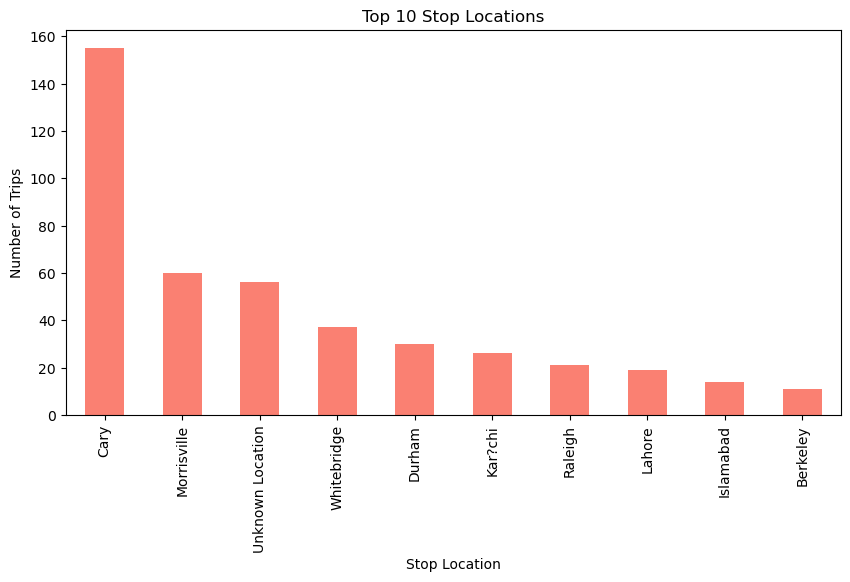

In [31]:
plt.figure(figsize=(10, 5))
df['STOP'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.xlabel("Stop Location")
plt.ylabel("Number of Trips")
plt.title("Top 10 Stop Locations")
plt.show()

#Trip Category Distribution

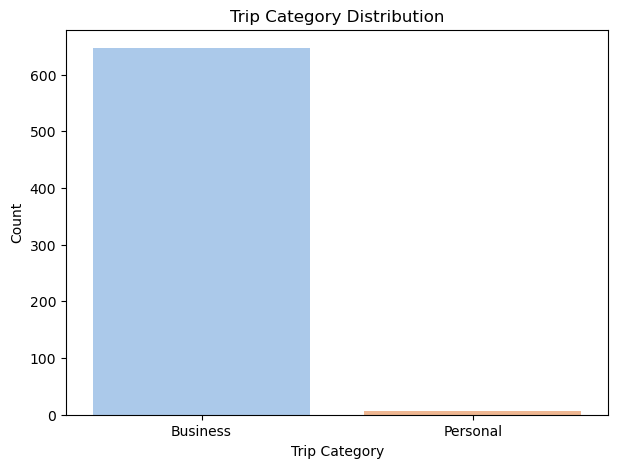

In [39]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='CATEGORY', hue='CATEGORY', palette='pastel', legend=False)
plt.xlabel("Trip Category")
plt.ylabel("Count")
plt.title("Trip Category Distribution")
plt.show()

#Trip Purpose Distribution

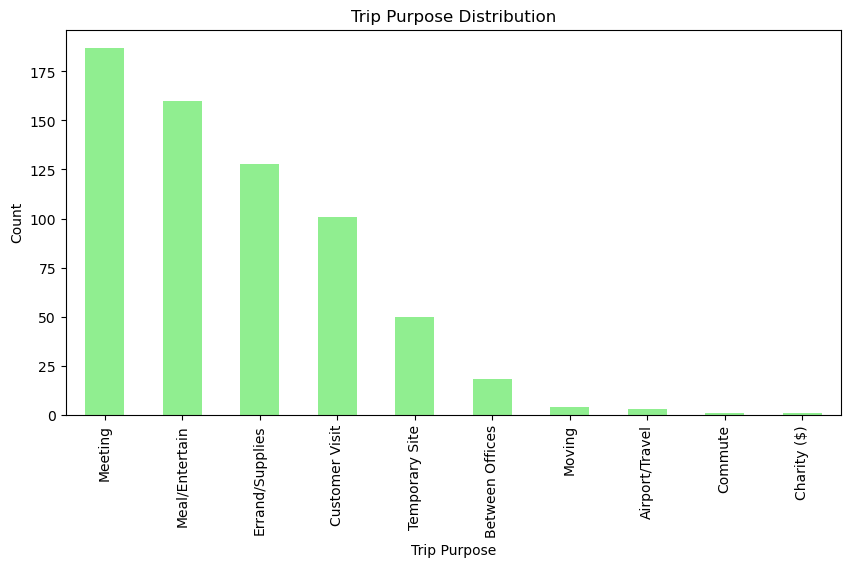

In [35]:
plt.figure(figsize=(10, 5))
df['PURPOSE'].value_counts().plot(kind='bar', color='lightgreen')
plt.xlabel("Trip Purpose")
plt.ylabel("Count")
plt.title("Trip Purpose Distribution")
plt.show()

#Histogram to analyze trip durations

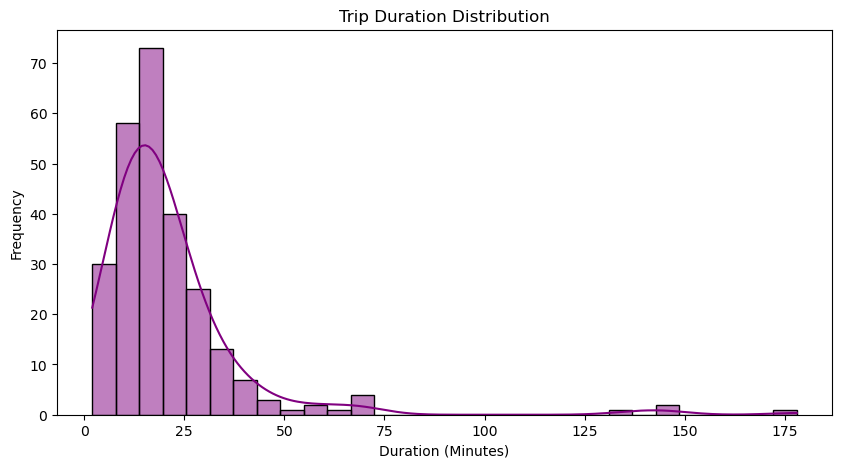

In [61]:
plt.figure(figsize=(10, 5))
sns.histplot(df['DURATION'], bins=30, kde=True, color='purple')
plt.xlabel("Duration (Minutes)")
plt.ylabel("Frequency")
plt.title("Trip Duration Distribution")
plt.show()

In [63]:
print("Basic Stats of Uber Trip Data:")
print(df.describe())


Basic Stats of Uber Trip Data:
                          START_DATE                       END_DATE  \
count                            261                            261   
mean   2016-06-01 16:09:56.091954176  2016-06-01 16:31:09.425287168   
min              2016-01-01 21:11:00            2016-01-01 21:17:00   
25%              2016-03-04 11:46:00            2016-03-04 12:06:00   
50%              2016-05-10 09:03:00            2016-05-10 09:20:00   
75%              2016-07-06 23:46:00            2016-07-06 23:59:00   
max              2016-12-12 20:48:00            2016-12-12 20:57:00   
std                              NaN                            NaN   

            MILES    DURATION  
count  261.000000  261.000000  
mean    10.314559   21.222222  
min      0.500000    2.000000  
25%      3.300000   11.000000  
50%      6.900000   17.000000  
75%     10.400000   24.000000  
max    174.200000  178.000000  
std     18.642603   20.329886  
